# Методи ансамблювання моделей

In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Імпорт даних

In [ ]:
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df[['Glucose', 'Age']]
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
def get_report(model, X_test, y_true):
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

# kNN (k-найближчі сусіди)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
get_report(knn, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7384    0.8467    0.7888       150
           1     0.6102    0.4444    0.5143        81

    accuracy                         0.7056       231
   macro avg     0.6743    0.6456    0.6516       231
weighted avg     0.6934    0.7056    0.6926       231



# Дерево Рішень

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
get_report(dt, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7292    0.7000    0.7143       150
           1     0.4828    0.5185    0.5000        81

    accuracy                         0.6364       231
   macro avg     0.6060    0.6093    0.6071       231
weighted avg     0.6428    0.6364    0.6391       231



# Логістична регресія

In [ ]:
log_reg = LogisticRegression(solver='lbfgs', max_iter = 1000)

log_reg.fit(X_train, y_train)
get_report(log_reg, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7644    0.8867    0.8210       150
           1     0.7018    0.4938    0.5797        81

    accuracy                         0.7489       231
   macro avg     0.7331    0.6902    0.7003       231
weighted avg     0.7424    0.7489    0.7364       231



# Ансамблювання: Голосування (Voting)

In [ ]:
from sklearn.ensemble import VotingClassifier

Для `VotingClassifier` нам не потрібно мати навчені моделі. Всередині, `VotingClassifier` створює копії моделей і навчає їх самостійно, а потім агрегує.

In [ ]:
dt = DecisionTreeClassifier()
knn_best = KNeighborsClassifier(n_neighbors=8)
log_reg = LogisticRegression(solver='lbfgs')

Модель не навчена, тому не може передбачати.

In [ ]:
# dt.predict(X_test)

In [ ]:
# оглошуємо словник моделей
estimators=[('knn', knn_best), ('dt', dt), ('log_reg', log_reg)]

# створюємо voting класифікатор
ensemble = VotingClassifier(estimators)

ensemble.fit(X_train, y_train)
get_report(ensemble, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7326    0.8400    0.7826       150
           1     0.5932    0.4321    0.5000        81

    accuracy                         0.6970       231
   macro avg     0.6629    0.6360    0.6413       231
weighted avg     0.6837    0.6970    0.6835       231



In [ ]:
?VotingClassifier

Після навчання початкові моделі залишилися ненавченими, тому `dt` все ще не може передбачати.

In [ ]:
# dt.predict(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Але оцінювач (estimator) був навчений у рамках ансамблю. Отримати всі оцінювачі ансамблю можемо так:

In [ ]:
ensemble.estimators_

[KNeighborsClassifier(n_neighbors=8),
 DecisionTreeClassifier(),
 LogisticRegression()]

А перевірити, що вони навчені - так:

In [ ]:
ensemble.estimators_[1].predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

М'яке голосування (soft voting) можливе лише тоді, коли всі ваші класифікатори можуть обчислювати ймовірності результатів (predict proba). М'яке голосування дає найкращий результат шляхом усереднення ймовірностей, обчислених окремими алгоритмами.  
Давайте спробуємо застосувати м'яке голосування.

In [ ]:
import inspect
from sklearn.tree import DecisionTreeRegressor

inspect.getmembers(DecisionTreeRegressor, predicate=inspect.isfunction)

[('__getstate__', <function sklearn.base.BaseEstimator.__getstate__(self)>),
 ('__init__',
  <function sklearn.tree._classes.DecisionTreeRegressor.__init__(self, *, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)>),
 ('__repr__',
  <function sklearn.base.BaseEstimator.__repr__(self, N_CHAR_MAX=700)>),
 ('__setstate__',
  <function sklearn.base.BaseEstimator.__setstate__(self, state)>),
 ('_check_feature_names',
  <function sklearn.base.BaseEstimator._check_feature_names(self, X, *, reset)>),
 ('_check_n_features',
  <function sklearn.base.BaseEstimator._check_n_features(self, X, reset)>),
 ('_compute_partial_dependence_recursion',
  <function sklearn.tree._classes.DecisionTreeRegressor._compute_partial_dependence_recursion(self, grid, target_features)>),
 ('_get_tags', <function sklearn.base.BaseEstimator

In [ ]:
ensemble = VotingClassifier(estimators, voting='soft')

ensemble.fit(X_train, y_train)
get_report(ensemble, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7600    0.7600    0.7600       150
           1     0.5556    0.5556    0.5556        81

    accuracy                         0.6883       231
   macro avg     0.6578    0.6578    0.6578       231
weighted avg     0.6883    0.6883    0.6883       231



Можемо передати ваги учасників голосування:

In [ ]:
estimators

[('knn', KNeighborsClassifier(n_neighbors=8)),
 ('dt', DecisionTreeClassifier()),
 ('log_reg', LogisticRegression())]

In [ ]:
ensemble = VotingClassifier(estimators, voting ='hard', weights=[2, 1, 10])

ensemble.fit(X_train, y_train)
get_report(ensemble, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7644    0.8867    0.8210       150
           1     0.7018    0.4938    0.5797        81

    accuracy                         0.7489       231
   macro avg     0.7331    0.6902    0.7003       231
weighted avg     0.7424    0.7489    0.7364       231



# Стекинг (Stacking)

stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'},             default='auto'
    Методи, що викликаються для кожного базового оцінювача. Це може бути:

    * якщо 'auto', він спробує викликати для кожного оцінювача
      `'predict_proba'`, `'decision_function'` або `'predict'` у цьому
      порядку.
    * в іншому випадку, один з `'predict_proba'`, `'decision_function'` або
      `'predict'`. Якщо метод не реалізований оцінювачем, буде викликана помилка.

In [ ]:
from sklearn.ensemble import StackingClassifier


estimators=[('knn', knn_best), ('dt', dt), ('log_reg', log_reg)]
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)
get_report(stacking_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7515    0.8267    0.7873       150
           1     0.6061    0.4938    0.5442        81

    accuracy                         0.7100       231
   macro avg     0.6788    0.6602    0.6658       231
weighted avg     0.7005    0.7100    0.7021       231



Ось атрибути стекінгу, до яких ви можете звернутися:

In [ ]:
vars(stacking_clf)

{'estimators': [('knn', KNeighborsClassifier(n_neighbors=8)),
  ('dt', DecisionTreeClassifier()),
  ('log_reg', LogisticRegression())],
 'final_estimator': LogisticRegression(),
 'cv': None,
 'stack_method': 'auto',
 'n_jobs': None,
 'verbose': 0,
 'passthrough': False,
 '_label_encoder': LabelEncoder(),
 'classes_': array([0, 1]),
 'final_estimator_': LogisticRegression(),
 'estimators_': [KNeighborsClassifier(n_neighbors=8),
  DecisionTreeClassifier(),
  LogisticRegression()],
 'named_estimators_': {'knn': KNeighborsClassifier(n_neighbors=8),
  'dt': DecisionTreeClassifier(),
  'log_reg': LogisticRegression()},
 'feature_names_in_': array(['Glucose', 'Age'], dtype=object),
 'stack_method_': ['predict_proba', 'predict_proba', 'predict_proba'],
 '_n_feature_outs': [1, 1, 1]}

Можна подивитися, які значення видає фінальна модель при різних вхідних значеннях:

In [ ]:
X_train.head()

,Glucose,Age
209,184,41
176,85,42
147,106,34
454,100,24
636,104,48


In [ ]:
stacking_clf.final_estimator_.predict_proba([[0.1,0.4,0.9]])

array([[0.58446238, 0.41553762]])

In [ ]:
stacking_clf.final_estimator_.predict([[0,1,1]])

array([0])

Виходить, що насправді найбільш значущою моделлю є knn при прийнятті рішень.

# Беггінг (Bagging) та Пастинг (Pasting)

Реалізація `BaggingClassifier` в `sklearn` включає в себе кілька алгоритмів з літератури.

-  Якщо випадкові підмножини даних обираються без заміни, то цей метод називається Pasting.

- Якщо зразки взяті з заміною, то метод відомий як Bagging.

- Коли випадкові підмножини набору даних вибираються як випадкові підмножини ознак (features), тоді метод відомий як Random Subspaces.

- Коли побудовані базові оцінювачі на підмножинах як зразків, так і ознак, тоді метод відомий як Random Patches.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=4),
    n_estimators=1000,
    max_samples=500,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
bag_clf.fit(X_train, y_train)

get_report(bag_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7403    0.7600    0.7500       150
           1     0.5325    0.5062    0.5190        81

    accuracy                         0.6710       231
   macro avg     0.6364    0.6331    0.6345       231
weighted avg     0.6674    0.6710    0.6690       231



## bootstrap=False - для алгоритму Pasting

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=200,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)
bag_clf.fit(X_train, y_train)

get_report(bag_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7438    0.7933    0.7677       150
           1     0.5634    0.4938    0.5263        81

    accuracy                         0.6883       231
   macro avg     0.6536    0.6436    0.6470       231
weighted avg     0.6805    0.6883    0.6831       231



Параметр `oob_score : bool`, за замовчуванням `False` і означає `Чи використовувати поза out-of-bag зразки для оцінки помилки узагальнення.`

In [ ]:
bag_clf.oob_score

False

## Оцінка Out-of-Bag

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,
    oob_score=True
)
bag_clf.fit(X_train, y_train)

get_report(bag_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7484    0.7933    0.7702       150
           1     0.5694    0.5062    0.5359        81

    accuracy                         0.6926       231
   macro avg     0.6589    0.6498    0.6531       231
weighted avg     0.6857    0.6926    0.6881       231



In [ ]:
bag_clf.oob_score_

# Випадковий ліс (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=5, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

get_report(rnd_clf, X_test, y_test)

              precision    recall  f1-score   support

           0     0.7374    0.8800    0.8024       150
           1     0.6538    0.4198    0.5113        81

    accuracy                         0.7186       231
   macro avg     0.6956    0.6499    0.6569       231
weighted avg     0.7081    0.7186    0.7003       231



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


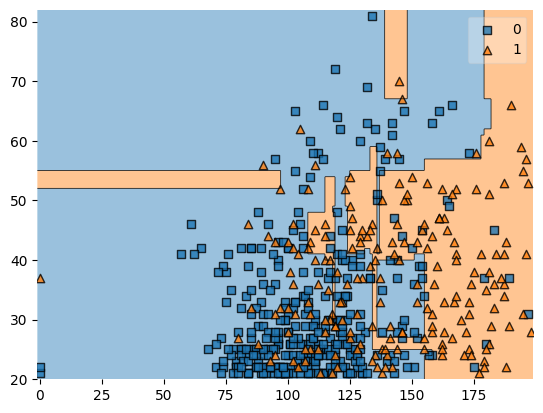

In [ ]:
plot_decision_regions(X_train.values, y_train.values, rnd_clf);

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


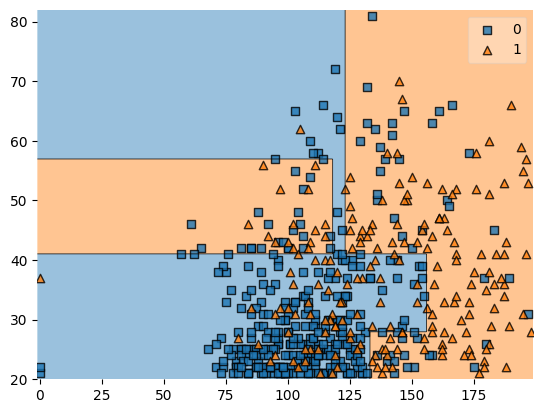

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=1, max_leaf_nodes=8, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
plot_decision_regions(X_train.values, y_train.values, rnd_clf);

Підберемо гіперпараметри:

In [ ]:
rf = RandomForestClassifier(random_state=42)
params_rf = {
    'n_estimators': [1, 5, 10, 50, 100, 200],
    'max_leaf_nodes':[4,8,16,32]
}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

get_report(rf_best, X_test, y_test)

{'max_leaf_nodes': 8, 'n_estimators': 1}
              precision    recall  f1-score   support

           0     0.7466    0.7267    0.7365       150
           1     0.5176    0.5432    0.5301        81

    accuracy                         0.6623       231
   macro avg     0.6321    0.6349    0.6333       231
weighted avg     0.6663    0.6623    0.6641       231



Scoring - краще встановлювати свій, тому що інакше буде використовуватися той, що за замовчуванням у алгоритму навчання, а у RandomForestClassifier - accuracy (точність).

In [ ]:
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators': [1, 5, 10, 50, 100, 200],
            'max_leaf_nodes':[4, 8, 16, 32]}
rf_gs = GridSearchCV(rf, params_rf, cv=5, scoring='f1_micro')
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

get_report(rf_best, X_test, y_test)

{'max_leaf_nodes': 8, 'n_estimators': 1}
              precision    recall  f1-score   support

           0     0.7466    0.7267    0.7365       150
           1     0.5176    0.5432    0.5301        81

    accuracy                         0.6623       231
   macro avg     0.6321    0.6349    0.6333       231
weighted avg     0.6663    0.6623    0.6641       231



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


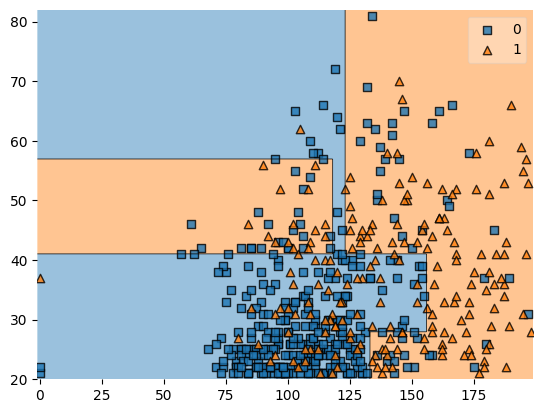

In [ ]:
plot_decision_regions(X_train.values, y_train.values, rf_best);

# Інші цікаві способи використання Random Forest
## Регресія за допомогою випадкового лісу (Random forest regression)

In [ ]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

In [ ]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

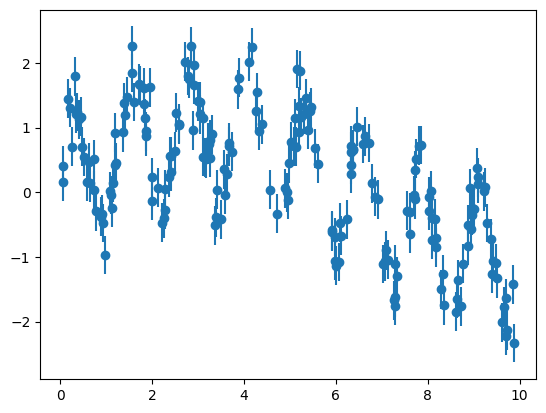

In [ ]:
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200)
forest.fit(x[:, None], y)

RandomForestRegressor(n_estimators=200)

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

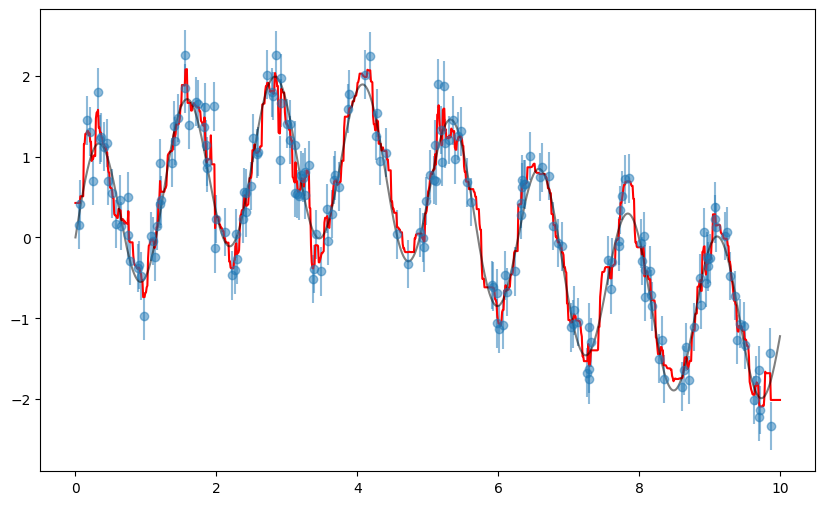

In [ ]:
plt.figure(figsize=(10,6))
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

## Random forest для класифікації зображень з цифрами

Спробуємо попрацювати з картинками 🖼
Для цього завантажимо набір рукописних цифр.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data.max()

16.0

Візуалізуємо наші дані.

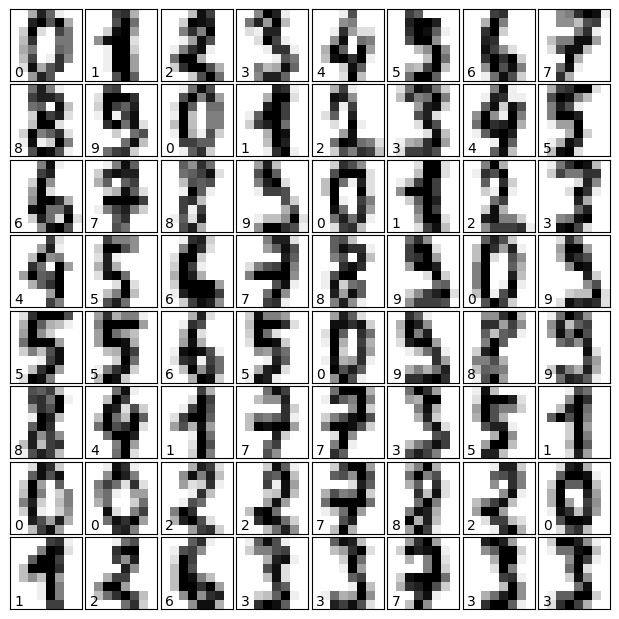

In [ ]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



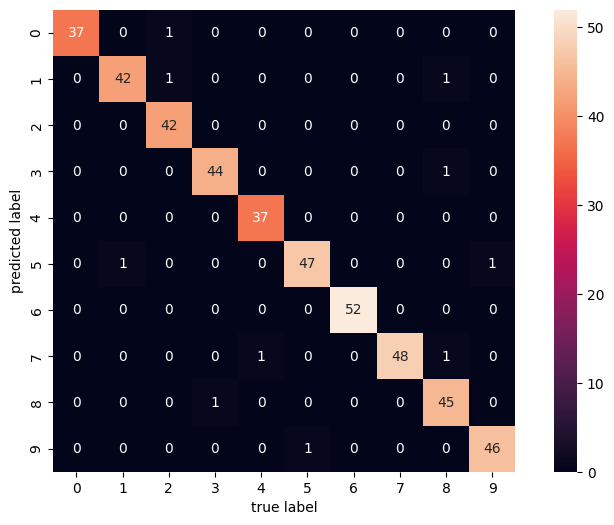

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
plt.figure(figsize=(10,6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
err_df = pd.DataFrame(digits.target, columns=['true'])
ypred_full = model.predict(digits.data)

err_df['pred'] = ypred_full
err_df.head()

,true,pred
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [ ]:
err_df[err_df['true'] != err_df['pred']]

,true,pred
5,5,9
37,9,5
746,4,7
899,8,3
905,8,1
1264,1,5
1299,2,1
1593,2,0
1666,8,7
1727,3,8


In [ ]:
err_df[:5]

,true,pred
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


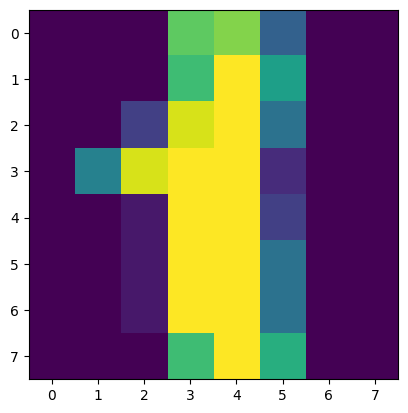

In [ ]:
plt.imshow(digits.images[1]);